In [1]:
import ptychoSampling.farfield.analysis_scripts.analysis_utils as anut
import ptychoSampling.farfield.analysis_scripts.combined_analysis_utils as cbut
from copy import deepcopy

import numpy as np
import ptychoSampling.farfield.analysis_scripts.latex_output_utils as ltxut
from ptychoSampling.farfield.analysis_scripts.lines_keys import colors, markers, linestyles

import ptychoSampling.farfield.analysis_scripts.plot_params as params
from ptychoSampling.farfield.analysis_scripts.plot_utils import xy, getData, PlotData, _plotObjAmpl, _plotObjPhase,_plotProbeAmpl
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter, NullFormatter

import os
import dill
import string

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
locations = ['poisson_1e3','poisson_1e4', 'poisson_1e6']
base_paths = [f'/raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/{loc}' for loc in locations]
data_paths = [f'{p}/figures/' for p in base_paths]

In [4]:
fluences = {37.9: r'$\overline{n}_{low}$', 379: r'$\overline{n}_{mod}$', 37900:r'$\overline{n}_{high}$'}

In [5]:
bp_g_suffix = params.suffixes["bpr"]["gaussian"]
g_pickles = [f'{v}{bp_g_suffix}' for v in ['bp_obj_error_gaussian', 'bp_flops_gaussian']]

In [6]:
g_dats = []
for d in data_paths:
    dats_this = []
    for p in g_pickles:
        fname = f'{d}/{p}.pkl'
        with open(fname, 'rb') as f:
            dats_this.append(dill.load(f))
    g_dats.append(dats_this)

In [9]:

from matplotlib.colors import LogNorm, Normalize, LinearSegmentedColormap
import matplotlib.font_manager as fm
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
    
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

LM-J /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e3/jlma_linesearch_efficient_gaussian_data.pkl
LM-J /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e4/jlma_linesearch_efficient_gaussian_data.pkl
LM-J /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e6/jlma_linesearch_efficient_gaussian_data.pkl


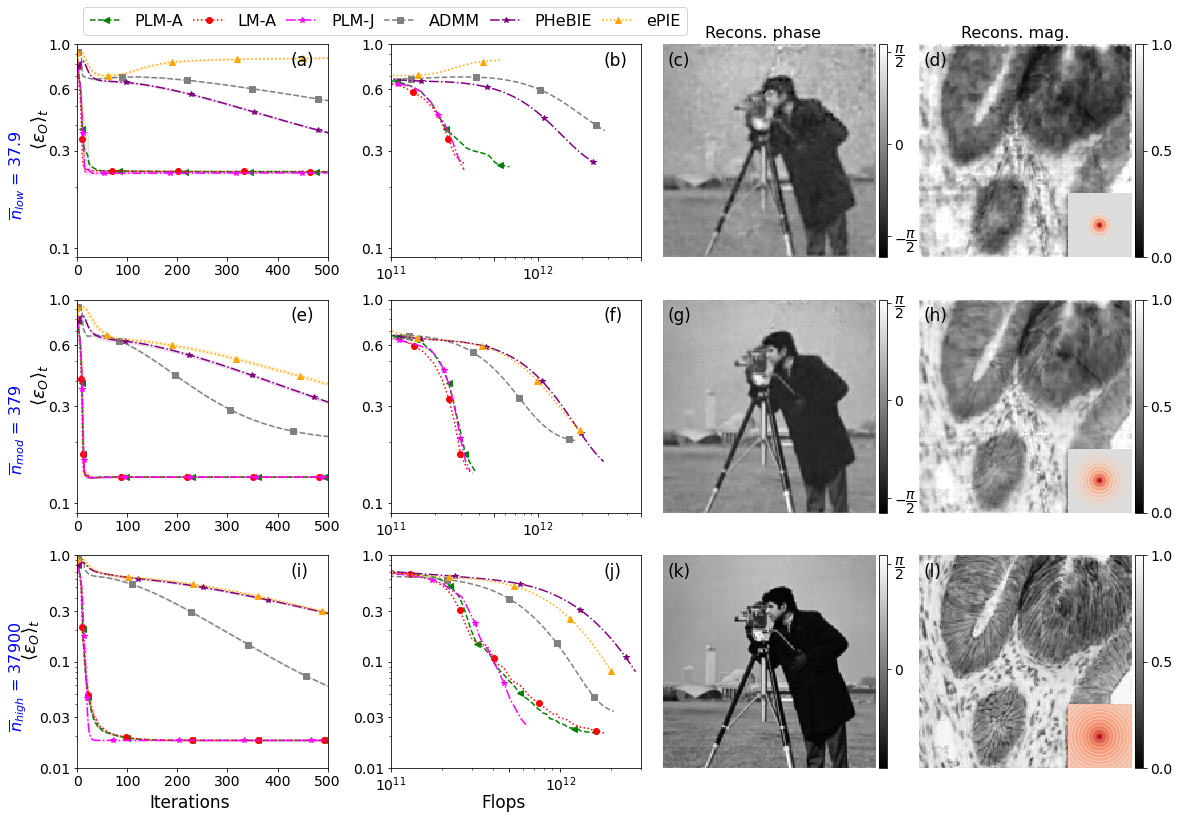

In [49]:
fig, axes = plt.subplots(3, 4, figsize=[16,11], constrained_layout=True)

for i, (fnum, flabel) in enumerate(fluences.items()):
    for j, d in enumerate(g_dats[i]):
        
        for l, (x, y) in enumerate(d.xys):
            k = d.keys[l]
            
            axes[i, j].plot(x, y, markevery=0.2, color=colors[k], ls=linestyles[k], marker=markers[k], label=d.labels[l])
            if len(d.lows) > 0:
                axes[i, j].fill_between(x, d.lows[l][:x.size], d.highs[l][:x.size], color=colors[k], alpha=0.1)

        #if d.yscale != '':
        #    axes[i, j].set_yscale(d.yscale)
        if d.xscale != '':
            axes[i, j].set_xscale(d.xscale)
        #axes[i, j].set_ylim(d.ylim)
        #axes[i, j].set_yticks(d.yticks, minor=False)
        
        axes[i,j].set_yscale('log')
        axes[i,j].yaxis.set_major_formatter(ScalarFormatter())
        axes[i,j].yaxis.set_minor_formatter(NullFormatter())
        if i == 2:
            
            axes[i,j].set_yticks([0.01, 0.03, 0.1, 0.3, 1.0], minor=False)
            axes[i,j].set_yticklabels([0.01, 0.03, 0.1, 0.3, 1.0])
            axes[i,j].set_ylim([0.01, 1.0])
        else: 
            axes[i,j].set_yticks([0.1, 0.3, 0.6, 1.0], minor=False)
            axes[i,j].set_yticklabels([0.1, 0.3, 0.6, 1.0])
            
            axes[i,j].set_ylim([0.09, 1.0])
        #axes[i,j].set_yticks([])

        
        
        axes[i, j].set_xlim(d.xlim)
        axes[i, j].set_xticks(d.xticks, minor=False)
        #axes[i, j].tick_params(axis='x', labelrotation=-15)
        axes[i, j].tick_params(which='both', labelsize=14)

        #legend = axes[i, j].legend(loc='best', fontsize=13, ncol=3)
        #legend.set_title(r'$\log_{10}(\beta)$', prop={'size':14})
        if axes[i,j].is_first_col():
            fluence_str = f'{flabel} = {fnum}'
            axes[i,j].annotate(fluence_str, xy=(-0.28, 0.2), xycoords='axes fraction',
                               fontsize=16, color='blue', rotation=90)  
            axes[i, j].set_ylabel(r'$\langle \epsilon_O\rangle_t$', fontsize=18, labelpad=-2, y=0.6)
        if axes[i,j].is_last_row():
            if j == 0:
                axes[i, j].set_xlabel('Iterations', fontsize=17)
                axes[i, j].xaxis.set_label_coords(0.45,-0.12)
            elif j == 1:
                axes[i, j].set_xlabel('Flops', fontsize=17)
                axes[i, j].xaxis.set_label_coords(0.45,-0.12)
        
        axes[i, j].text(0.85, 0.9, '(' + string.ascii_lowercase[i * 4 + j] + ')', transform=axes[i, j].transAxes, 
                        size=17)
    base_path = base_paths[i]
    data_fname_dict = {'LM-J': f'{base_path}/jlma_linesearch_efficient_gaussian_data.pkl'}
    objs_all, probes_all = getData(data_fname_dict)
    mean_obj_plmj = objs_all['PLM-J'].mean(axis=0)
    _plotObjAmpl(np.abs(mean_obj_plmj), axes[i, 3])
    
    angles = np.angle(mean_obj_plmj)
    angles = angles - np.mean(angles)
    _plotObjPhase(angles, axes[i,2])
    
    mean_probe_plmj = np.fft.fftshift(probes_all['PLM-J'].mean(axis=0))
    axin = axes[i,3].inset_axes([0.7, 0., 0.3, 0.3])
    new_cmap = truncate_colormap(plt.get_cmap('coolwarm'), minval=0.5, maxval=1)
    probe_absvals = np.abs(mean_probe_plmj)
    vmin = 0.2
    caxin = axin.pcolormesh(probe_absvals, cmap=new_cmap,
                            norm=LogNorm(vmin=vmin, vmax=probe_absvals.max()))
    caxin.axes.set_axis_off()
    #_plotProbeAmpl(np.abs(mean_probe_plmj), axin)
    
    axes[i, 2].text(0.02, 0.9, '(' + string.ascii_lowercase[i * 4 + 2] + ')', transform=axes[i, 2].transAxes, 
                        size=17)
    axes[i, 3].text(0.02, 0.9, '(' + string.ascii_lowercase[i * 4 + 3] + ')', transform=axes[i, 3].transAxes, 
                        size=17)
    
axes[0, 2].text(0.2, 1.03, 'Recons. phase', transform=axes[0, 2].transAxes, 
                        size=16) 
axes[0, 3].text(0.2, 1.03, 'Recons. mag.', transform=axes[0, 3].transAxes, 
                        size=16) 
handles, labels = axes[0,0].get_legend_handles_labels()
legend = fig.legend(handles, labels, bbox_to_anchor=(0.60, 1.03),  ncol=6, fontsize=16, columnspacing=0.6)

#plt.subplots_adjust(top=0.95, bottom=0.1, left=0.1, right=0.9, hspace=0.2,
#                    wspace=0.25)
#plt.tight_layout(h_pad=0, w_pad=0)
plt.savefig('bp_gaussian.pdf', bbox_inches='tight')

In [56]:
del mean_obj_plmj, mean_probe_plmj

LM-J-S /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e3/jlma_linesearch_efficient_gaussian_data.pkl


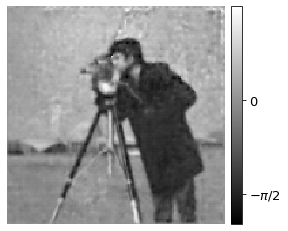

In [15]:
base_path = base_paths[0]
data_fname_dict = {'LM-J-S': f'{base_path}/jlma_linesearch_efficient_gaussian_data.pkl'}
objs_all, probes_all = getData(data_fname_dict)
mean_obj_plmjs = objs_all['PLM-J-S'].mean(axis=0)
ax = plt.subplot(1,1,1)
cax = plt.pcolormesh(np.angle(mean_obj_plmjs), cmap='gray')
cbar = plt.colorbar(cax, pad=0.02)
cbar.set_ticks([-np.pi,-np.pi/2, 0, np.pi/2, np.pi])
cbar.set_ticklabels([r'$-\pi$', r'$-\pi/2$',r'$0$',r'$\pi/2$',r'$\pi$',])
#cmap='gray')  # , vmin=-np.pi, vmax=np.pi)
#    cax.axes.set_axis_off()
#    cb = plt.colorbar(cax, pad=0.02)
    # cb = plt.colorbar(cax, ticks=[-np.pi, 0, np.pi], pad=0.02)
    # cb.ax.set_yticklabels([r'$-\pi/2$', r'0', r'$\pi/2$'])
cbar.ax.tick_params(labelsize=13)
ax.set_aspect('equal')
ax.axes.set_axis_off()

# Plotting the poisson data

In [6]:
bp_p_suffix = params.suffixes["bpr"]["poisson"]
p_pickles = [f'{v}{bp_p_suffix}' for v in ['bp_obj_error_poisson', 'bp_flops_poisson']]

In [7]:
p_dats = []
for d in data_paths:
    dats_this = []
    for p in p_pickles:
        fname = f'{d}/{p}.pkl'
        with open(fname, 'rb') as f:
            dats_this.append(dill.load(f))
    p_dats.append(dats_this)

LM-J-S /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e3/jlma_linesearch_efficient_tol2_poisson_surrogate_data.pkl
LM-J-S /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e4/jlma_linesearch_efficient_tol2_poisson_surrogate_data.pkl
LM-J-S /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e6/jlma_linesearch_efficient_tol2_poisson_surrogate_data.pkl


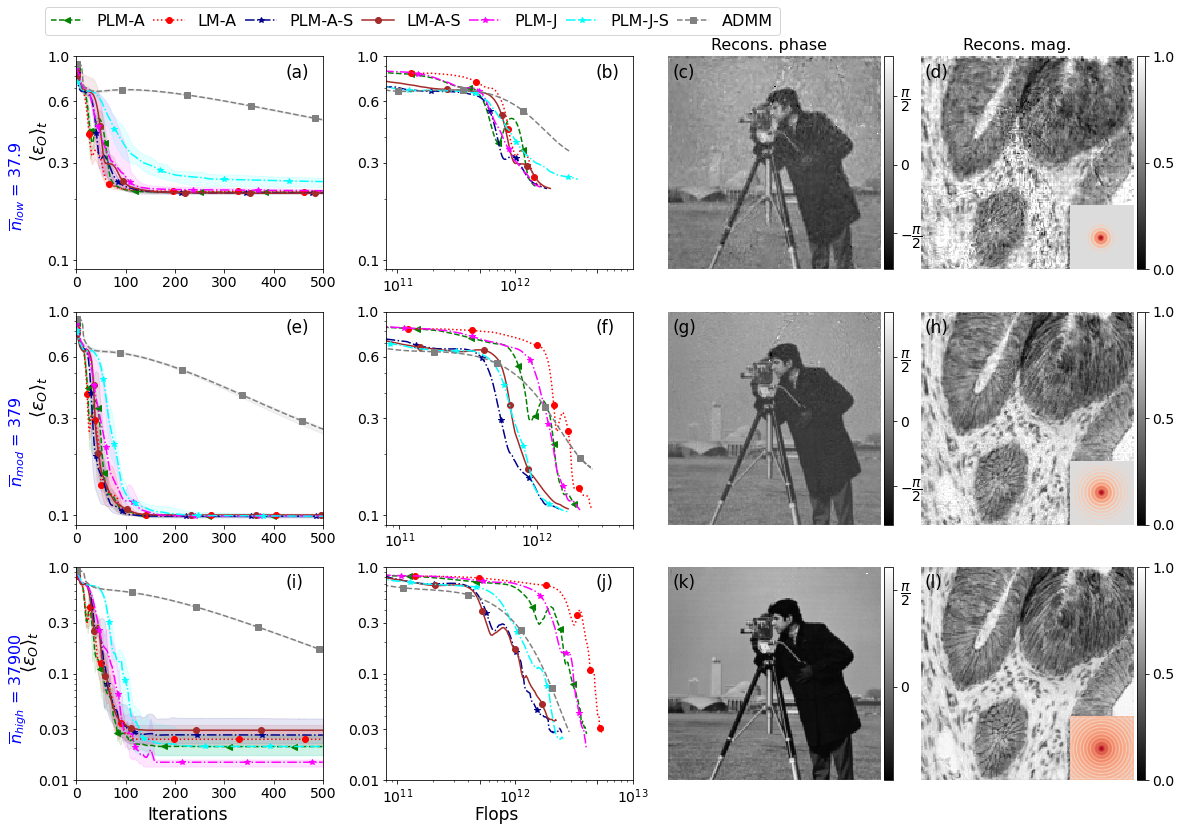

In [22]:
fig, axes = plt.subplots(3, 4, figsize=[16,11], constrained_layout=True)

for i, (fnum, flabel) in enumerate(fluences.items()):
    for j, d in enumerate(p_dats[i]):
        
        for l, (x, y) in enumerate(d.xys):
            k = d.keys[l]
            
            axes[i, j].plot(x, y, markevery=0.2, color=colors[k], ls=linestyles[k], marker=markers[k], label=d.labels[l])
            if len(d.lows) > 0:
                axes[i, j].fill_between(x, d.lows[l][:x.size], d.highs[l][:x.size], color=colors[k], alpha=0.1)

        #if d.yscale != '':
        #    axes[i, j].set_yscale(d.yscale)
        if d.xscale != '':
            axes[i, j].set_xscale(d.xscale)
        #axes[i, j].set_ylim(d.ylim)
        #axes[i, j].set_yticks(d.yticks, minor=False)
        
        axes[i,j].set_yscale('log')
        axes[i,j].yaxis.set_major_formatter(ScalarFormatter())
        axes[i,j].yaxis.set_minor_formatter(NullFormatter())
        if i == 2:
            
            axes[i,j].set_yticks([0.01, 0.03, 0.1, 0.3, 1.0], minor=False)
            axes[i,j].set_yticklabels([0.01, 0.03, 0.1, 0.3, 1.0])
            axes[i,j].set_ylim([0.01, 1.0])
        else: 
            axes[i,j].set_yticks([0.1, 0.3, 0.6, 1.0], minor=False)
            axes[i,j].set_yticklabels([0.1, 0.3, 0.6, 1.0])
            
            axes[i,j].set_ylim([0.09, 1.0])
        #axes[i,j].set_yticks([])

        
        
        axes[i, j].set_xlim(d.xlim)
        axes[i, j].set_xticks(d.xticks, minor=False)
        #axes[i, j].tick_params(axis='x', labelrotation=-15)
        axes[i, j].tick_params(which='both', labelsize=14)

        #legend = axes[i, j].legend(loc='best', fontsize=13, ncol=3)
        #legend.set_title(r'$\log_{10}(\beta)$', prop={'size':14})
        if axes[i,j].is_first_col():
            fluence_str = f'{flabel} = {fnum}'
            axes[i,j].annotate(fluence_str, xy=(-0.28, 0.2), xycoords='axes fraction',
                               fontsize=16, color='blue', rotation=90)  
            axes[i, j].set_ylabel(r'$\langle \epsilon_O\rangle_t$', fontsize=18, labelpad=-2, y=0.6)
        if axes[i,j].is_last_row():
            if j == 0:
                axes[i, j].set_xlabel('Iterations', fontsize=17)
                axes[i, j].xaxis.set_label_coords(0.45,-0.12)
            elif j == 1:
                axes[i, j].set_xlabel('Flops', fontsize=17)
                axes[i, j].xaxis.set_label_coords(0.45,-0.12)
        
        axes[i, j].text(0.85, 0.9, '(' + string.ascii_lowercase[i * 4 + j] + ')', transform=axes[i, j].transAxes, 
                        size=17)
    base_path = base_paths[i]
    data_fname_dict = {'LM-J-S': f'{base_path}/jlma_linesearch_efficient_tol2_poisson_surrogate_data.pkl'}
    objs_all, probes_all = getData(data_fname_dict)
    mean_obj_plmjs = objs_all['PLM-J-S'].mean(axis=0)
    
    angles = np.angle(mean_obj_plmjs)
    angles = angles - np.mean(angles)
    _plotObjPhase(angles, axes[i,2])
    _plotObjAmpl(np.abs(mean_obj_plmjs), axes[i, 3])
    
    mean_probe_plmjs = np.fft.fftshift(probes_all['PLM-J-S'].mean(axis=0))
    axin = axes[i,3].inset_axes([0.7, 0., 0.3, 0.3])
    new_cmap = truncate_colormap(plt.get_cmap('coolwarm'), minval=0.5, maxval=1)
    probe_absvals = np.abs(mean_probe_plmjs)
    vmin = 0.2
    caxin = axin.pcolormesh(probe_absvals, cmap=new_cmap,
                            norm=LogNorm(vmin=vmin, vmax=probe_absvals.max()))
    
    axin.set_axis_off()
    #_plotProbeAmpl(np.abs(mean_probe_plmj), axin)
    
    axes[i, 2].text(0.02, 0.9, '(' + string.ascii_lowercase[i * 4 + 2] + ')', transform=axes[i, 2].transAxes, 
                        size=17)
    axes[i, 3].text(0.02, 0.9, '(' + string.ascii_lowercase[i * 4 + 3] + ')', transform=axes[i, 3].transAxes, 
                        size=17)
    
axes[0, 2].text(0.2, 1.03, 'Recons. phase', transform=axes[0, 2].transAxes, 
                        size=16) 
axes[0, 3].text(0.2, 1.03, 'Recons. mag.', transform=axes[0, 3].transAxes, 
                        size=16) 
handles, labels = axes[0,0].get_legend_handles_labels()
#legend = fig.legend(handles, labels, bbox_to_anchor=(0.65, 1.03),  ncol=7, fontsize=16, columnspacing=0.6)
legend = fig.legend(handles, labels, bbox_to_anchor=(0.68, 1.045),  ncol=7, fontsize=16, columnspacing=0.5)

#plt.subplots_adjust(top=0.95, bottom=0.1, left=0.1, right=0.9, hspace=0.2,
#                    wspace=0.25)
#plt.tight_layout(h_pad=0, w_pad=0)
plt.savefig('bp_poisson.pdf', bbox_inches='tight')

LM-J-S /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e3/jlma_linesearch_efficient_tol2_poisson_surrogate_data.pkl
LM-J-S /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e4/jlma_linesearch_efficient_tol2_poisson_surrogate_data.pkl
LM-J-S /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e6/jlma_linesearch_efficient_tol2_poisson_surrogate_data.pkl


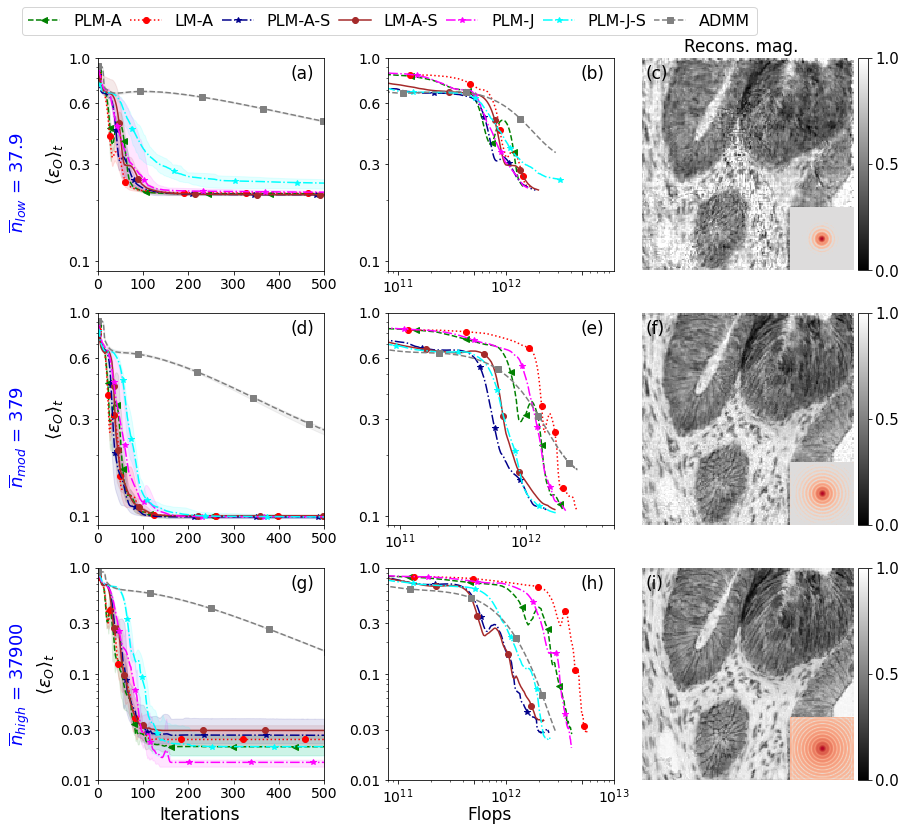

In [43]:
fig, axes = plt.subplots(3, 3, figsize=[12,11], constrained_layout=True)

for i, (fnum, flabel) in enumerate(fluences.items()):
    for j, d in enumerate(p_dats[i]):
        for l, (x, y) in enumerate(d.xys):
            k = d.keys[l]
            
            axes[i, j].plot(x, y, markevery=0.2, color=colors[k], ls=linestyles[k], marker=markers[k], label=d.labels[l])
            if len(d.lows) > 0:
                axes[i, j].fill_between(x, d.lows[l][:x.size], d.highs[l][:x.size], color=colors[k], alpha=0.1)

        #if d.yscale != '':
        #    axes[i, j].set_yscale(d.yscale)
        if d.xscale != '':
            axes[i, j].set_xscale(d.xscale)
        
        axes[i,j].set_yscale('log')
        axes[i,j].yaxis.set_major_formatter(ScalarFormatter())
        axes[i,j].yaxis.set_minor_formatter(NullFormatter())
        if i == 2:
            
            axes[i,j].set_yticks([0.01, 0.03, 0.1, 0.3, 1.0], minor=False)
            axes[i,j].set_yticklabels([0.01, 0.03, 0.1, 0.3, 1.0])
            axes[i,j].set_ylim([0.01, 1.0])
        else: 
            axes[i,j].set_yticks([0.1, 0.3, 0.6, 1.0], minor=False)
            axes[i,j].set_yticklabels([0.1, 0.3, 0.6, 1.0])
            
            axes[i,j].set_ylim([0.09, 1.0])
        
        #axes[i, j].set_ylim(d.ylim)
        #axes[i, j].set_yticks(d.yticks, minor=False)
        axes[i, j].set_xlim(d.xlim)
        axes[i, j].set_xticks(d.xticks, minor=False)
        
        axes[i, j].tick_params(which='both', labelsize=14)

        #legend = axes[i, j].legend(loc='best', fontsize=13, ncol=3)
        #legend.set_title(r'$\log_{10}(\beta)$', prop={'size':14})
        if axes[i,j].is_first_col():
            fluence_str = f'{flabel} = {fnum}'
            axes[i,j].annotate(fluence_str, xy=(-0.4, 0.2), xycoords='axes fraction',
                               fontsize=18, color='blue', rotation=90) 
            axes[i, j].set_ylabel(r'$\langle \epsilon_O\rangle_t$', fontsize=18)
        if axes[i,j].is_last_row():
            if j == 0:
                axes[i, j].set_xlabel('Iterations', fontsize=17)
                axes[i, j].xaxis.set_label_coords(0.45,-0.12)
            elif j == 1:
                axes[i, j].set_xlabel('Flops', fontsize=17)
                axes[i, j].xaxis.set_label_coords(0.45,-0.12)
        
        axes[i, j].text(0.85, 0.9, '(' + string.ascii_lowercase[i * 3 + j] + ')', transform=axes[i, j].transAxes, 
                        size=17)
    base_path = base_paths[i]
    data_fname_dict = {'LM-J-S': f'{base_path}/jlma_linesearch_efficient_tol2_poisson_surrogate_data.pkl'}
    objs_all, probes_all = getData(data_fname_dict)
    mean_obj_plmjs = objs_all['PLM-J-S'].mean(axis=0)
    _plotObjAmpl(np.abs(mean_obj_plmjs), axes[i, 2])
    
    mean_probe_plmjs = np.fft.fftshift(probes_all['PLM-J-S'].mean(axis=0))
    axin = axes[i,2].inset_axes([0.7, 0., 0.3, 0.3])
    probe_absvals = np.abs(mean_probe_plmjs)
    
    vmin = 0.2
    caxin = axin.pcolormesh(probe_absvals, cmap=new_cmap,
                            norm=LogNorm(vmin=vmin, vmax=probe_absvals.max()))
    caxin.axes.set_axis_off()
    axes[i, 2].text(0.02, 0.9, '(' + string.ascii_lowercase[i * 3 + 2] + ')', transform=axes[i, 2].transAxes, 
                        size=17)
    

axes[0, 2].text(0.2, 1.03, 'Recons. mag.', transform=axes[0, 2].transAxes, size=17) 
handles, labels = axes[0,0].get_legend_handles_labels()
legend = fig.legend(handles, labels, bbox_to_anchor=(0.88, 1.045),  ncol=7, fontsize=16, columnspacing=0.5)
#plt.subplots_adjust(top=0.95, bottom=0.1, left=0.1, right=0.9, hspace=0.2,
#                    wspace=0.25)
#plt.tight_layout(h_pad=0, w_pad=0)
plt.savefig('bp_poisson.pdf', bbox_inches='tight')

LM-J-S /raid/home/skandel/code/ptychoSampling_v2/experiments/farfield/poisson_1e3/jlma_linesearch_tol2_poisson_surrogate_data.pkl


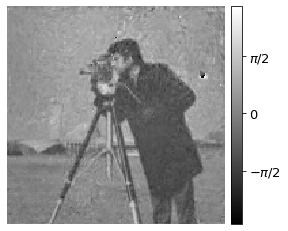

In [80]:
base_path = base_paths[0]
data_fname_dict = {'LM-J-S': f'{base_path}/jlma_linesearch_tol2_poisson_surrogate_data.pkl'}
objs_all, probes_all = getData(data_fname_dict)
mean_obj_plmjs = objs_all['PLM-J-S'].mean(axis=0)
ax = plt.subplot(1,1,1)
cax = plt.pcolormesh(np.angle(mean_obj_plmjs), cmap='gray')
cbar = plt.colorbar(cax, pad=0.02)
cbar.set_ticks([-np.pi,-np.pi/2, 0, np.pi/2, np.pi])
cbar.set_ticklabels([r'$-\pi$', r'$-\pi/2$',r'$0$',r'$\pi/2$',r'$\pi$',])
#cmap='gray')  # , vmin=-np.pi, vmax=np.pi)
#    cax.axes.set_axis_off()
#    cb = plt.colorbar(cax, pad=0.02)
    # cb = plt.colorbar(cax, ticks=[-np.pi, 0, np.pi], pad=0.02)
    # cb.ax.set_yticklabels([r'$-\pi/2$', r'0', r'$\pi/2$'])
cbar.ax.tick_params(labelsize=13)
ax.set_aspect('equal')
ax.axes.set_axis_off()